In [14]:
from iminuit import Minuit
import numpy as np
import math
from math import*
%matplotlib inline
from matplotlib import pyplot as plt

In [15]:
def nll1(a0,b):
    data = np.loadtxt('')#load the data
    x = (data[:,0])
    n2 = (data[:,1])
    r1 = len(n2)
    n=[]
    f=0
    for i in range(r1):
       n.append(floor(n2[i]))
    for i in range(r1): 
        if(x[i]<120 or x[i]>130):
          f_i = (a0*math.e**(-b*x[i]) + b*n[i]*x[i] - n[i]*math.log(a0) + n[i]*math.log(n[i]) - n[i])
          f = f + f_i
    return f

In [16]:
m = Minuit(nll1,a0=56000,b=0.03)
m.limits["a0"]=(50000,100000)
m.migrad()  # find minimum
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.82                      │              Nfcn = 153              │
│ EDM = 1.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   56e3    │    5e3    │            │            │  50000  │ 100000  │       │
│ 1 │ b    │  34.4e-3  │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────┐
│    │        a0         b │
├────┼─────────────────────┤
│ a0 │  2.12e+07 3.0610813 │
│  b │ 3.0610813  4.49e-07 │
└────┴─────────────────────┘

In [17]:
a0_fit = m.values["a0"]
b_fit = m.values["b"]
print(a0_fit,b_fit)

55530.69677674181 0.03438617322176677


[105.68236329 107.15852501 108.72931513 110.20382034 111.58431833
 113.15759322 114.62754301 116.10722482 117.58214415 119.15417666
 120.62951012 122.10898487 123.5868031  125.06544959 126.53995479
 128.11281556 129.58877021 131.0645178  132.5425431  134.02263904
 135.59674219 137.07580281 138.54678791 140.02709092 141.50449502
 142.98044967 144.55807292 146.03547702 147.51122461 148.99111349
 150.56728728 152.04531258 153.52313081 154.90197229]


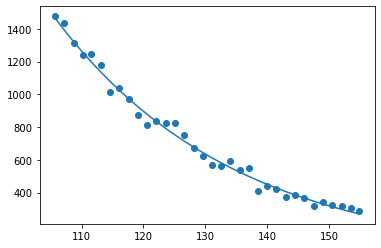

In [18]:
data = np.loadtxt('/home/user/work/SINP_2023/hepap-saha/cms_mass_events_2012_data_w.txt')
x = (data[:,0])
n2 = (data[:,1])
r = len(x)
y = []
print(x)
def f(t):
    return(a0_fit*exp(-b_fit*t))
for i in range(r):
    y.append(f(x[i]))
plt.plot(x,y)
plt.scatter(x,n2)
plt.savefig('fit-bkgd-exp-cms-calib-binned-2.png')

In [19]:
def nll2(a0,b,a1):
    data = np.loadtxt('')
    x = (data[:,0])
    n2 = (data[:,1])
    r1 = len(n2)
    n=[]
    f=0
    mu = 125.3
    a=2
    for i in range(r1):
       n.append(floor(n2[i]))
    for i in range(r1): 
        f = f + ((a0*math.e**(-b*x[i]) + (a1*math.e**(-(x[i] - mu)**2/a**2))) - n[i]*math.log(a0*math.e**(-b*x[i]) + (a1*math.e**(-(x[i] - mu)**2/a**2))) + n[i]*math.log(n[i]) - n[i])
    return f

In [20]:
m = Minuit(nll2,a0=50000,b=0.03,a1=70)
m.limits["a1"]=(10,1000)
m.limits["a0"]=(0,100000)
m.migrad()  # find minimum
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.66                      │              Nfcn = 142              │
│ EDM = 3.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   55e3    │    5e3    │            │            │    0    │ 100000  │       │
│ 1 │ b    │  34.4e-3  │  0.7e-3   │            │            │         │         │       │
│ 2 │ a1   │    68     │    32     │            │            │   10    │  1000   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │        a0         b        a1 │
├────┼───────────────────────────────┤
│ a0 │  2.11e+07 3.0576366     1.7e3 │
│  b │ 3.0576366  4.49e-07 1.0433e-3 │
│ a1 │     1.7e3 1.0433e-3  1.05e+03 │
└────┴───────────────────────────────┘

In [21]:
a0_fit = m.values["a0"]
b_fit = m.values["b"]
a1_fit = m.values["a1"]
print(a0_fit,b_fit,a1_fit)

55362.35952438447 0.03440202146823393 68.3899808438227


[105.68236329 107.15852501 108.72931513 110.20382034 111.58431833
 113.15759322 114.62754301 116.10722482 117.58214415 119.15417666
 120.62951012 122.10898487 123.5868031  125.06544959 126.53995479
 128.11281556 129.58877021 131.0645178  132.5425431  134.02263904
 135.59674219 137.07580281 138.54678791 140.02709092 141.50449502
 142.98044967 144.55807292 146.03547702 147.51122461 148.99111349
 150.56728728 152.04531258 153.52313081 154.90197229]


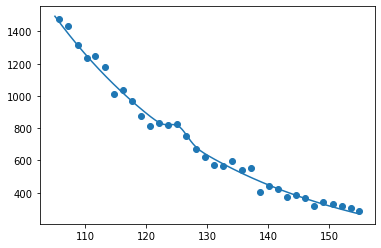

In [22]:
data = np.loadtxt('')
x = (data[:,0])
n2 = (data[:,1])
r = len(x)
y = []
print(x)
mu = 125.3
a = 2
x1 = np.arange(105,155,0.1)
def f(t):
    return(a0_fit*exp(-b_fit*t) + a1_fit*exp(-(t - mu)**2/a**2))
for i in x1:
    y.append(f(i))    
plt.plot(x1,y)
plt.scatter(x,n2)

## Compute likelihood ratio for 1000 toy data sets

In [23]:
#=====================================================================================================
#required functions:
def f1(t):  
    #fit values obtained from fitting data with fit func.
    #define your fit function for full dta
def f2(t): 
    #define the bkg function
#=====================================================================================================
#functions to create and store toy datasets:    
def num1(): #create toy data by introducing Poisson fluctuation in the bkgd fit model and store it
    
    return n
def num2(): #read the data generated by num1() and store the toy data
    n=[]
    dat = np.loadtxt('toy_data_bkg_local.txt')
    for i in dat:
        n.append(i)
    return n
def num3(): #create toy data by introducing Poisson fluctuation in the data fit model
    
    return n
def num4(): #store the toy data
    n=[]
    dat = np.loadtxt('toy_data_sig_local.txt')
    for i in dat:
        n.append(i)
    #print(n)  
    return n         
#==============================================================================================================    
#neg-log-likelihood functions:
def fact(n):
    f=1
    for i in range(1,n+1):
        f = f*i
    return f    
    
def nll1(a0,b): #neg-log-likelihood func for toy data generated from bkgd only fit with and exp
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    #define likelihood for data generated from exp and to be fitted by exp
    return f

def nll2(a0,b,a1): #neg-log-likelihood func for toy data generated from bkgd only fit with and exp+gauss
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    #define likelihood for data generated from exp and to be fitted with exp+gaussian
    return f

def nll5(a0,b): #neg-log-likelihood func for toy data generated from bkgd+sig fit with and exp
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    #define likelihood for data generated from exp+gaussian and to be fitted by exp
    return f

def nll6(a0,b,a1): #neg-log-likelihood func for toy data generated from bkgd+sig fit with and exp+gauss
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    #define likelihood for data generated from exp+gaussian and to be fitted by exp+gaussian
    return f

def nll3(n,a0,b): #calculates neg-log-likelihood and chisq for exp fit
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    #write function to calculate negative log likelihood given parameters and data       
    return lchi

def nll4(n,a0,b,a1): #calculates neg-log-likelihood and chisq for exp+gauss fit
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    #write function to calculate negative log likelihood given parameters and data 
    return lchi

In [ ]:
llrb=[]
k=0
for i in range(10000000):
    n=num1()  #put num1() for bkgd, num3() for full data
    m=Minuit(nll1,a0=50000,b=0.02) #use nll1 for bkgd, nll5 for full data
    #call minuit to to fit data using exp
    #check if minima is valid and hesse is accurate by the boolian variable m.valid and m.accurate
    
    m=Minuit(nll2,a0=50000,b=0.03,a1=50)  #use nll2 for bkgd, nll6 for full data
    #call minuit to to fit data using exp+gaussian  
    #check if minima is valid and hesse is accurate by the boolian variable m.valid and m.accurate
    
    if (gxp_valid*gxp_acc): gxp_va
       k=k+1
       #check negative likelihood for exp fit, store value in nl1
       #check negative likelihood for exp+gaussian fit, store value in nl3
       
       llrb.append(2*(nl1-nl2))
       
    if (k>=1000):
       break   

In [3]:
def f(t):
    return math.e**(-((t)/2))/(2*(t)**0.5*sqrt(2*math.pi))
#plot the likelihood ratio for 1000 toy data generated from exp only along with this function

In [2]:
#plot the likelihood ratio for 1000 toy data generated from exp+gaussian

In [1]:
#get the mean value of the likelihood ratios for 1000 toy data generated from exp+gaussian, and do sqrt of that

In [180]:
##you have just calculated the significance for the cms data, 2012, corresponding to diphoton channel. 
#Reported is 4.1